In [36]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [37]:
df_train = pd.read_csv('./data/train.csv')
df_generated1 = pd.read_csv('./data/generated_data/generated_dataset0.csv')
df_generated2 = pd.read_csv('./data/generated_data/generated_dataset1.csv')
df_generated3 = pd.read_csv('./data/generated_data/generated_dataset2.csv')
df_generated4 = pd.read_csv('./data/generated_data/generated_dataset3.csv')
df_generated5 = pd.read_csv('./data/generated_data/generated_dataset4.csv')
df_generated6 = pd.read_csv('./data/generated_data/generated_dataset5.csv')
df_generated7 = pd.read_csv('./data/generated_data/generated_dataset6.csv')
df_generated8 = pd.read_csv('./data/generated_data/generated_dataset7.csv')
df_generated9 = pd.read_csv('./data/generated_data/generated_dataset8.csv')
df_generated10 = pd.read_csv('./data/generated_data/generated_dataset9.csv')

In [38]:
X = [
    df_generated1['Survived'].value_counts()[0],
    df_generated2['Survived'].value_counts()[0],
    df_generated3['Survived'].value_counts()[0],
    df_generated4['Survived'].value_counts()[0],
    df_generated5['Survived'].value_counts()[0],
    df_generated6['Survived'].value_counts()[0],
    df_generated7['Survived'].value_counts()[0],
    df_generated8['Survived'].value_counts()[0],
    df_generated9['Survived'].value_counts()[0],
    df_generated10['Survived'].value_counts()[0]
]

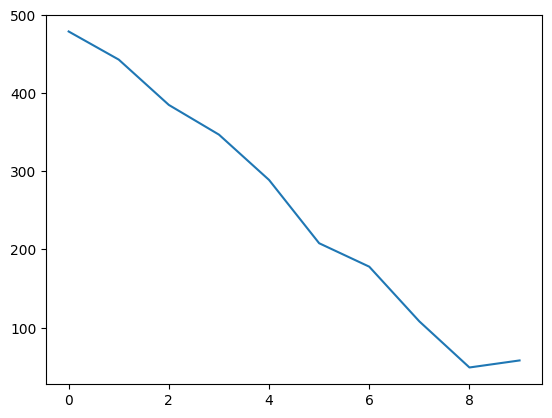

In [39]:
plt.plot(X)

## Training the model on training data:

In [29]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=5)
for train_index, test_index in split.split(df_train, df_train["Pclass"]):
    train_split = df_train.loc[train_index]
    test_split = df_train.loc[test_index]


class Dropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])


class Imputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy="median")
        X['Age'] = imputer.fit_transform(X[['Age']])
        X['Fare'] = imputer.fit_transform(X[['Fare']])
        
        X['Embarked'] = X['Embarked'].fillna('S')
        return X


class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # One-hot encodings:
        # Note that we'll have to drop the categorical cols at the end
        
        # Encoding Sex:
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        # Encoding Female into a one-hot vector
        X[encoder.categories_[0][0]] = matrix[:, 0]
        
        # Encoding Pclass:
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Pclass']]).toarray()
        # Encoding Pclass 1 and 2 into one-hot vectors
        for idx, col in enumerate(encoder.categories_[0][:-1]):
            X["Pclass" + str(col)] = matrix[:, idx]
            
        # Encoding Embarked:
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        # Encoding Pclass 1 and 2 into one-hot vectors
        for idx, col in enumerate(encoder.categories_[0][:-1]):
            X[col] = matrix[:, idx]
            
        return X.drop(columns=['Sex', 'Pclass', 'Embarked'])


class Scaler(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        scaler = StandardScaler()
        X['Age'] = scaler.fit_transform(X[['Age']])
        
        X['Fare'] = scaler.fit_transform(X[['Fare']])
        return X


pipe = Pipeline([
    ("dropper", Dropper()),
    ("imputer", Imputer()),
    ("feature_encoder", FeatureEncoder()),
    ("scaler", Scaler())
])


# Preprocessing:
df_train_split_preprocessed = pipe.fit_transform(train_split)
df_test_split_preprocessed = pipe.fit_transform(test_split)

X_train = df_train_split_preprocessed.drop(columns=['Survived'])
y_train = df_train_split_preprocessed[["Survived"]]

X_test = df_test_split_preprocessed.drop(columns=['Survived'])
y_test = df_test_split_preprocessed[["Survived"]]

In [30]:
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [31]:
y_pred = clf.predict(X_test)
print(f"Accuracy on hold-out test set: {accuracy_score(y_test, y_pred)}")

Accuracy on hold-out test set: 0.7597765363128491


## Testing model performance on each of the generated datasets:

In [40]:
X_gen1 = df_generated1.drop(columns=['Survived'])
y_gen1 = df_generated1[["Survived"]]

X_gen2 = df_generated2.drop(columns=['Survived'])
y_gen2 = df_generated2[["Survived"]]

X_gen3 = df_generated3.drop(columns=['Survived'])
y_gen3 = df_generated3[["Survived"]]

X_gen4 = df_generated4.drop(columns=['Survived'])
y_gen4 = df_generated4[["Survived"]]

X_gen5 = df_generated5.drop(columns=['Survived'])
y_gen5 = df_generated5[["Survived"]]

X_gen6 = df_generated6.drop(columns=['Survived'])
y_gen6 = df_generated6[["Survived"]]

X_gen7 = df_generated7.drop(columns=['Survived'])
y_gen7 = df_generated7[["Survived"]]

X_gen8 = df_generated8.drop(columns=['Survived'])
y_gen8 = df_generated8[["Survived"]]

X_gen9 = df_generated9.drop(columns=['Survived'])
y_gen9 = df_generated9[["Survived"]]

X_gen10 = df_generated10.drop(columns=['Survived'])
y_gen10 = df_generated10[["Survived"]]

In [41]:
y_pred_gen1 = clf.predict(X_gen1)
y_pred_gen2 = clf.predict(X_gen2)
y_pred_gen3 = clf.predict(X_gen3)
y_pred_gen4 = clf.predict(X_gen4)
y_pred_gen5 = clf.predict(X_gen5)
y_pred_gen6 = clf.predict(X_gen6)
y_pred_gen7 = clf.predict(X_gen7)
y_pred_gen8 = clf.predict(X_gen8)
y_pred_gen9 = clf.predict(X_gen9)
y_pred_gen10 = clf.predict(X_gen10)

In [42]:
X = [
    accuracy_score(y_gen1, y_pred_gen1),
    accuracy_score(y_gen2, y_pred_gen2),
    accuracy_score(y_gen3, y_pred_gen3),
    accuracy_score(y_gen4, y_pred_gen4),
    accuracy_score(y_gen5, y_pred_gen5),
    accuracy_score(y_gen6, y_pred_gen6),
    accuracy_score(y_gen7, y_pred_gen7),
    accuracy_score(y_gen8, y_pred_gen8),
    accuracy_score(y_gen9, y_pred_gen9),
    accuracy_score(y_gen10, y_pred_gen10)
]

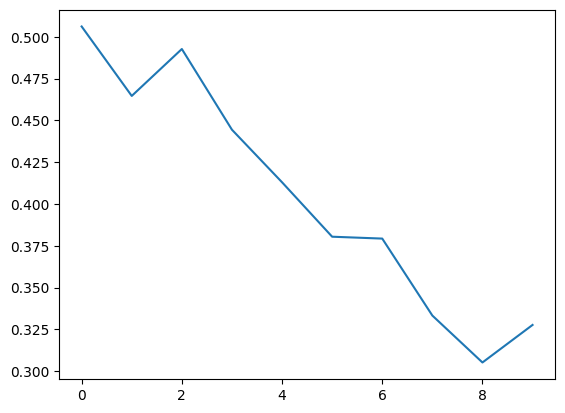

In [43]:
plt.plot(X)